In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_frame = pd.read_csv('DATA_CSV/lending_club_loan_two.csv')

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

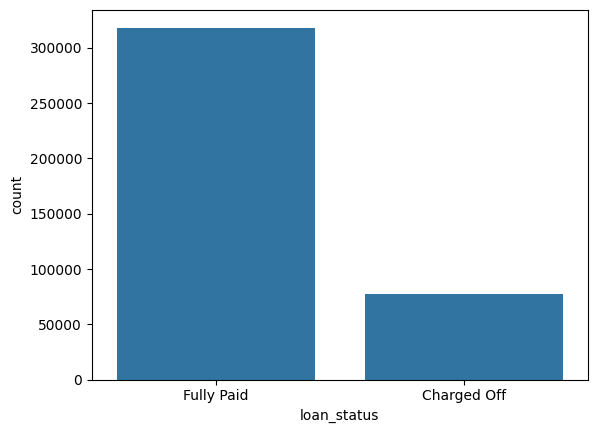

In [4]:
sns.countplot(data_frame,x = 'loan_status')
plt.show()

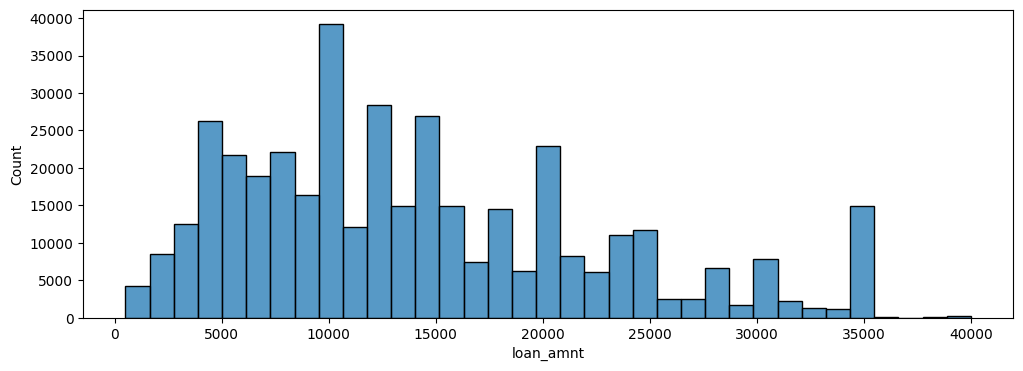

In [5]:
plt.figure(figsize = (12,4))
sns.histplot(data_frame,x = 'loan_amnt',kde = False,bins = 35)
plt.show()



In [6]:
mtr = data_frame.corr(numeric_only = True)

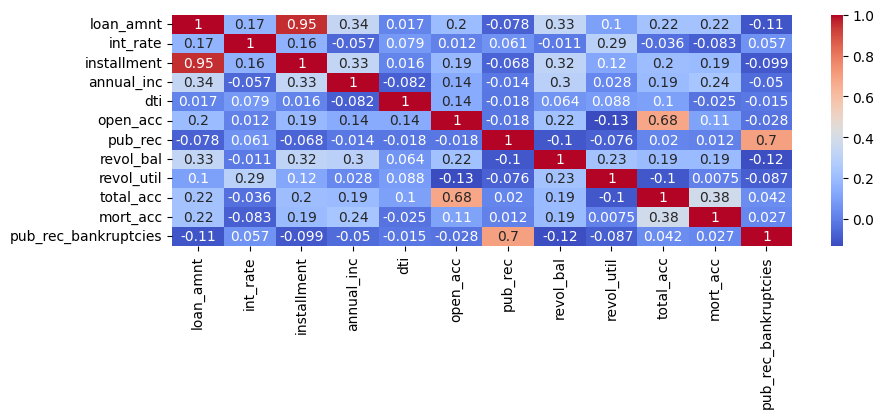

In [7]:
plt.figure(figsize = (10,3))
sns.heatmap(mtr,annot = True,cmap = "coolwarm")
plt.show()

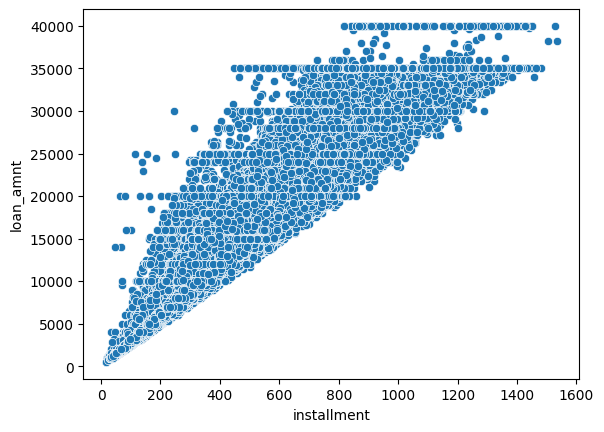

In [8]:
sns.scatterplot(data_frame, x = 'installment', y = 'loan_amnt')
plt.show()

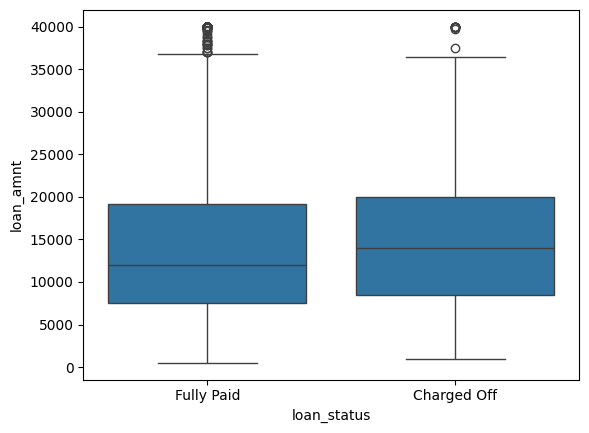

In [9]:
sns.boxplot(data_frame, x= 'loan_status', y = 'loan_amnt')
plt.show()

In [10]:
data_frame.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [11]:
data_frame.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [12]:
data_frame['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [13]:
data_frame['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

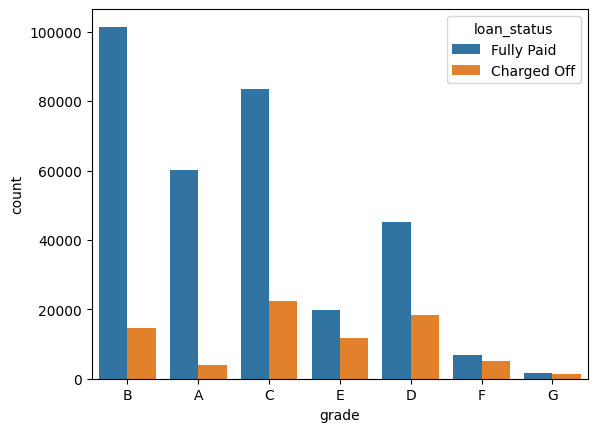

In [14]:
sns.countplot(data_frame, x = 'grade', hue = 'loan_status')
plt.show()

/var/folders/y8/3xsgmxdx3hxfvg2mbv0p9mpr0000gn/T/ipykernel_7702/4186160415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_frame, x = 'sub_grade',order = sotred_subgrade,palette = 'viridis')


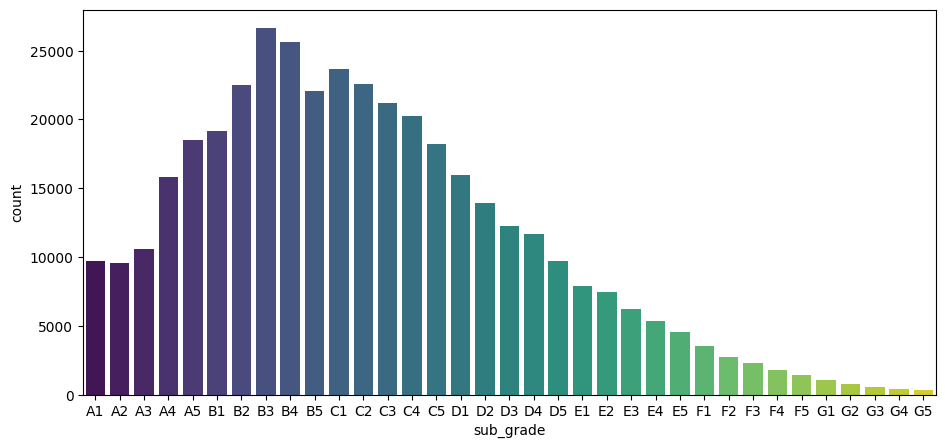

In [15]:
plt.figure(figsize= (11,5))
sotred_subgrade = sorted(data_frame['sub_grade'].unique())
sns.countplot(data_frame, x = 'sub_grade',order = sotred_subgrade,palette = 'viridis')
plt.show()

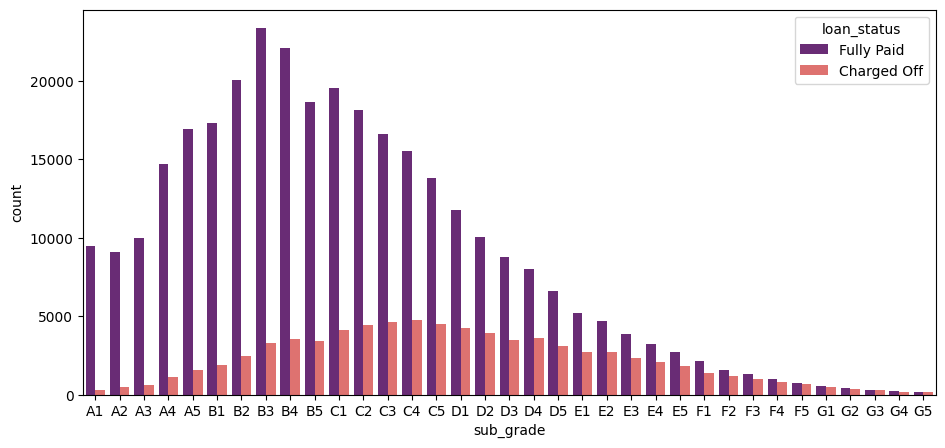

In [16]:
plt.figure(figsize= (11,5))
sotred_subgrade = sorted(data_frame['sub_grade'].unique())
sns.countplot(data_frame, x = 'sub_grade',order = sotred_subgrade,palette = 'magma',hue = 'loan_status')
plt.show()

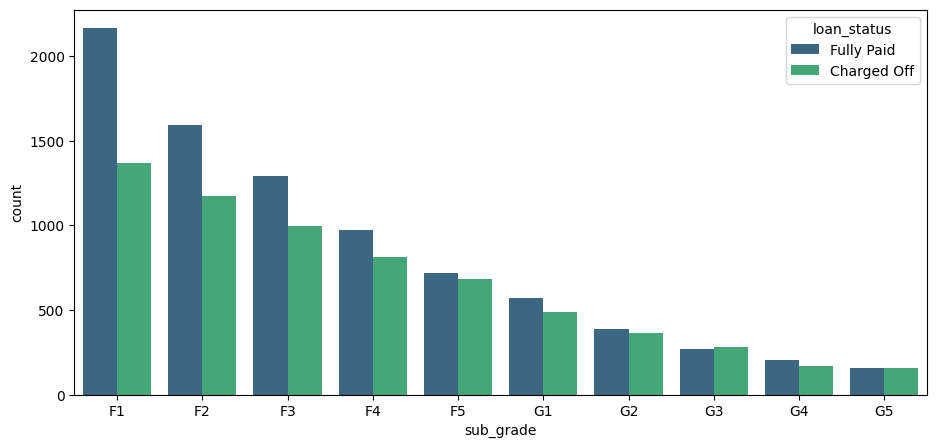

In [17]:
plt.figure(figsize= (11,5))
f_gsubgrade = data_frame[data_frame['sub_grade'].str.startswith('F')|data_frame['sub_grade'].str.startswith('G')]
sotred_subgrade = sorted(f_gsubgrade['sub_grade'].unique())
sns.countplot(data_frame, x = 'sub_grade',order = sotred_subgrade,palette = 'viridis',hue = 'loan_status')
plt.show()

In [18]:
data_frame['loan_repaid'] = data_frame['loan_status'].map({'Fully Paid' : 1, 'Charged Off':0})

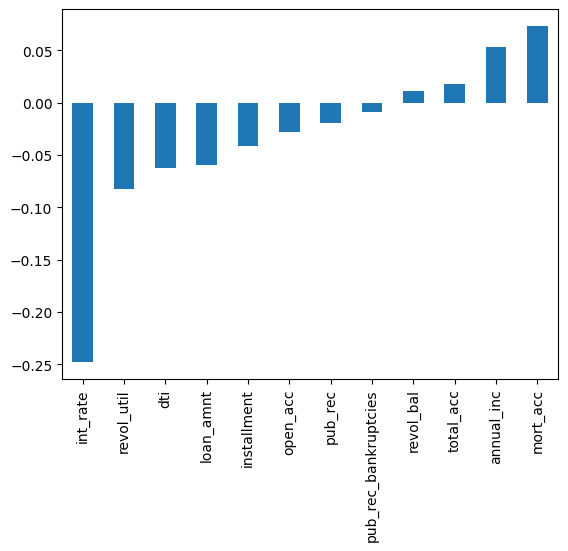

In [19]:
data_frame.corr(numeric_only = True)['loan_repaid'].drop('loan_repaid').sort_values().plot(kind = 'bar')
plt.show()

In [20]:
data_frame.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [21]:
def clean_emp_length(val):
    if pd.isnull(val):
        return np.nan
    if '<' in val:
        return 0.5
    if '+' in val:
        return 10
    return float(val.split()[0])
data_frame['empt_length_clean'] = data_frame['emp_length'].apply(clean_emp_length)
mean_val = np.round(data_frame['empt_length_clean'].mean(),2)
data_frame['empt_length_clean'].fillna(mean_val,inplace = True)
data_frame.drop(['emp_title','issue_d','emp_length'],axis = 1, inplace = True)

/var/folders/y8/3xsgmxdx3hxfvg2mbv0p9mpr0000gn/T/ipykernel_7702/267916111.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['empt_length_clean'].fillna(mean_val,inplace = True)


In [22]:
len(data_frame)

396030

In [23]:
missing_values = data_frame.isnull().sum()

In [24]:
missing_values * 100 / len(data_frame) 

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
empt_length_clean       0.000000
dtype: float64

In [25]:
data_frame.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'empt_length_clean'],
      dtype='object')

In [26]:
sorted(data_frame['empt_length_clean'].unique())

[np.float64(0.5),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(5.98),
 np.float64(6.0),
 np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0),
 np.float64(10.0)]

/var/folders/y8/3xsgmxdx3hxfvg2mbv0p9mpr0000gn/T/ipykernel_7702/4015441288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_frame,x = 'empt_length_clean',palette = 'magma')


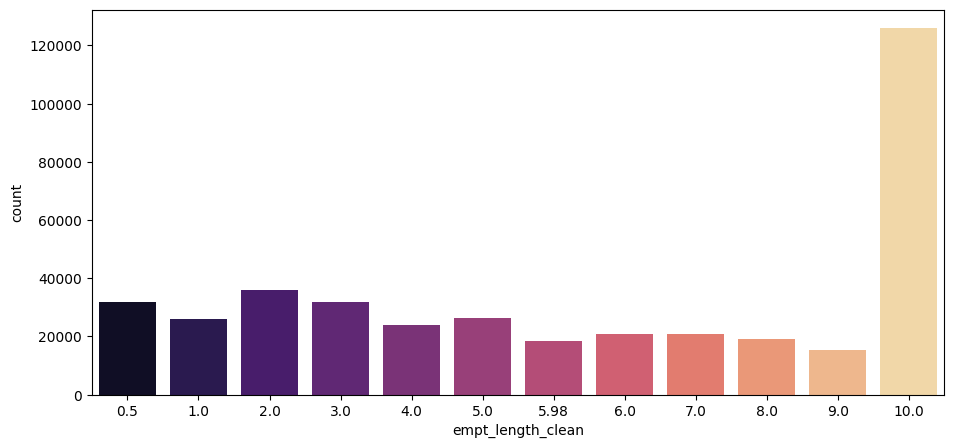

In [27]:
plt.figure(figsize= (11,5))
sns.countplot(data_frame,x = 'empt_length_clean',palette = 'magma')
plt.show()

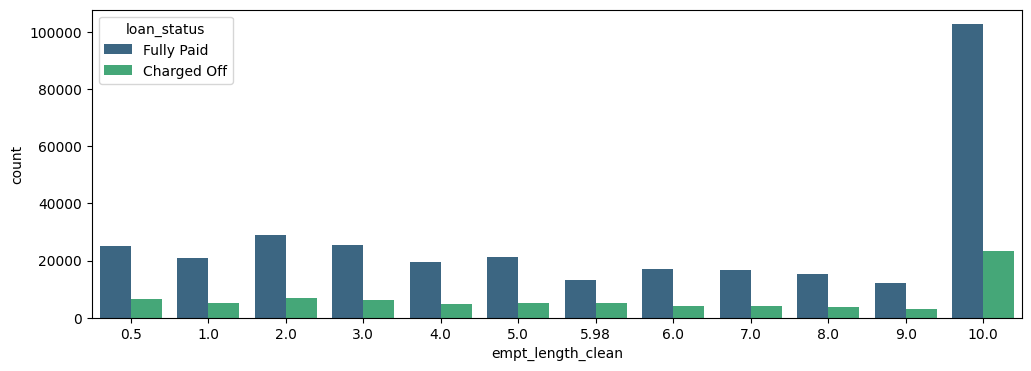

In [28]:
plt.figure(figsize= (12,4))
sns.countplot(data_frame,x = 'empt_length_clean',palette = 'viridis',hue = 'loan_status')
plt.show()

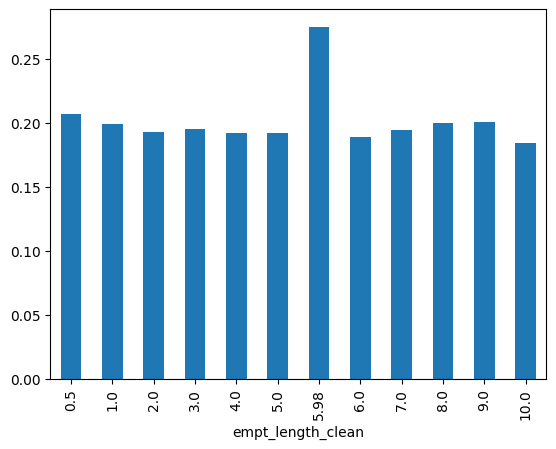

In [29]:
co = data_frame[data_frame['loan_status'] == 'Charged Off'].groupby(['empt_length_clean']).count()['loan_status']
fp = data_frame[data_frame['loan_status'] == 'Fully Paid'].groupby(['empt_length_clean']).count()['loan_status']
per = co/(co + fp)
per.plot(kind = 'bar')
plt.show()

In [30]:
data_frame.isna().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
empt_length_clean       0.000000
dtype: float64

In [31]:
data_frame.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'empt_length_clean'],
      dtype='object')

In [32]:

data_frame = data_frame.drop('empt_length_clean',axis=1)

In [33]:
data_frame.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
data_frame['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [35]:
data_frame = data_frame.drop('title',axis = 1)

In [36]:
data_frame['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [37]:
data_frame.corr(numeric_only = True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [38]:
data_frame[['mort_acc', 'total_acc']].corr()

,mort_acc,total_acc
mort_acc,1.000000,0.381072
total_acc,0.381072,1.000000


In [39]:
group_sizes = data_frame['total_acc'].value_counts().sort_index()
missing_rows = data_frame[data_frame['mort_acc'].isna()]
group_counts_for_missing = missing_rows['total_acc'].map(group_sizes)
msn = (group_counts_for_missing >= 30).sum()
msn / len(missing_rows)

np.float64(0.9998941658949596)

In [40]:
def fill_by_group(cf,group_col,target_col):
    group_avg = data_frame.groupby(group_col)[target_col].mean()
    overall_avg = data_frame[target_col].mean()
    def filler(row):
        if pd.isnull(row[target_col]):
            return group_avg.get(row[group_col],overall_avg)
        else:
            return row[target_col]
    return data_frame.apply(filler, axis= 1)
    
    

In [41]:
data_frame['mort_acc'] = fill_by_group(data_frame, 'total_acc', 'mort_acc')

In [42]:
data_frame['pub_rec_bankruptcies'] = fill_by_group(data_frame, 'pub_rec', 'pub_rec_bankruptcies')

In [43]:
data_frame.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
address                   0
loan_repaid               0
dtype: int64

In [44]:
data_frame.corr(numeric_only = True)['pub_rec_bankruptcies']

loan_amnt              -0.106276
int_rate                0.057681
installment            -0.098389
annual_inc             -0.050061
dti                    -0.014419
open_acc               -0.027587
pub_rec                 0.699495
revol_bal              -0.124419
revol_util             -0.086387
total_acc               0.042157
mort_acc                0.029344
pub_rec_bankruptcies    1.000000
loan_repaid            -0.009450
Name: pub_rec_bankruptcies, dtype: float64

In [45]:
data_frame = data_frame.dropna()
data_frame.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [46]:
data_frame.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [47]:
data_frame['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395754, dtype: object

In [48]:
data_frame['term']= data_frame['term'].map(lambda x: int(x.split()[0]))
data_frame['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395754, dtype: int64

In [49]:
data_frame['term'].value_counts()

term
36    301782
60     93972
Name: count, dtype: int64

In [50]:
data_frame = data_frame.drop(columns = 'grade', axis = 1)

In [51]:
data_frame['sub_grade'].head()

0    B4
1    B5
2    B3
3    A2
4    C5
Name: sub_grade, dtype: object

In [52]:
subgrade_dummies = pd.get_dummies(data_frame['sub_grade'],drop_first = True)
data_frame = pd.concat([data_frame.drop('sub_grade',axis = 1),subgrade_dummies],axis = 1)


In [53]:
data_frame.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [54]:

subgrade_dummies = pd.get_dummies(data_frame[['verification_status','application_type','initial_list_status','purpose']],drop_first = True)
data_frame = pd.concat([data_frame.drop(['verification_status','application_type','initial_list_status','purpose'],axis = 1),subgrade_dummies],axis = 1)


In [55]:
data_frame['home_ownership'].value_counts()

home_ownership
MORTGAGE    198219
RENT        159677
OWN          37714
OTHER          110
NONE            31
ANY              3
Name: count, dtype: int64

In [56]:
data_frame['home_ownership'] = data_frame['home_ownership'].replace(['NONE','ANY'],'OTHER')
subgrade_dummies = pd.get_dummies(data_frame['home_ownership'],drop_first = True)
data_frame = pd.concat([data_frame.drop('home_ownership',axis = 1),subgrade_dummies],axis = 1)


In [57]:
data_frame['zip_code'] = data_frame['address'].apply(lambda x : (x[-5:]))

In [58]:
subgrade_dummies = pd.get_dummies(data_frame['zip_code'],drop_first = True)
data_frame= pd.concat([data_frame.drop('zip_code',axis = 1),subgrade_dummies],axis = 1)
data_frame = data_frame.drop(columns = 'address',axis = 1)

In [59]:
data_frame['earliest_cr_line'] = data_frame['earliest_cr_line'].apply(lambda x : int(x[-4:]))

In [60]:
data_frame['earliest_cr_line'].value_counts()

earliest_cr_line
2000    29348
2001    29061
1999    26471
2002    25880
2003    23648
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
data_frame = data_frame.drop('loan_status',axis = 1)

In [63]:
X = data_frame.drop('loan_repaid',axis = 1)
y = data_frame['loan_repaid'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
print(X_train.shape)
print(X_test.shape)

(277027, 78)
(118727, 78)


In [68]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [70]:
model = Sequential()

model.add(Dense(70,activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(30,activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(20,activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy')

In [71]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_Loss',mode = 'min',verbose = 1,patience = 9)
model.fit(x = X_train, y = y_train,epochs = 20,batch_size = 250,validation_data = (X_test,y_test),callbacks= [early_stop])

Epoch 1/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 0.3841 - val_loss: 0.2643
Epoch 2/20
 254/1109 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.2755

/opt/miniconda3/envs/tf-env/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_Loss` which is not available. Available metrics are: loss,val_loss
  current = self.get_monitor_value(logs)


1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 0.2725 - val_loss: 0.2623
Epoch 3/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2643 - val_loss: 0.2614
Epoch 4/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 0.2646 - val_loss: 0.2611
Epoch 5/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - loss: 0.2628 - val_loss: 0.2607
Epoch 6/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 0.2624 - val_loss: 0.2621
Epoch 7/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - loss: 0.2605 - val_loss: 0.2606
Epoch 8/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - loss: 0.2618 - val_loss: 0.2607
Epoch 9/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 0.2597 - val_loss: 0.2602
Epoch 10/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 0.2607 - val_loss: 0.2616
Epoch 11/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - loss: 0.2589 - val_loss: 0.2605
Epoch 12/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 0.2609 - val_loss: 0.2603
Epoch 13/20
1109/110

In [72]:
from tensorflow.keras.models import load_model

In [73]:
model.save('mymodel.h5')

In [74]:
loss = pd.DataFrame(model.history.history)

<Axes: >

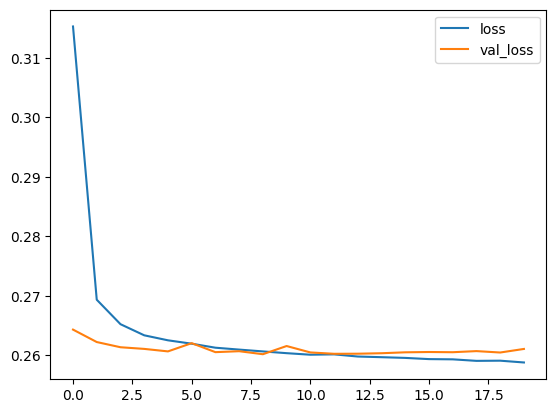

In [75]:
loss.plot()

In [76]:
from sklearn.metrics import classification_report

In [77]:
pred = model.predict(X_test)
pred_class = (pred>0.5).astype(int)
print(classification_report(y_test,pred_class))

3711/3711 ━━━━━━━━━━━━━━━━━━━━ 1s 171us/step
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23237
           1       0.88      1.00      0.93     95490

    accuracy                           0.89    118727
   macro avg       0.94      0.71      0.77    118727
weighted avg       0.90      0.89      0.87    118727



In [78]:
data_frame['loan_repaid'].value_counts()
318144/len(data_frame)

0.8038933276732516